# Example Image

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pylab

from scipy.ndimage import gaussian_filter

In [2]:
pylab.rcParams['figure.figsize'] = (14.0, 8.0)

In [3]:
def display(data, title='example', shape=None):
    
    if not isinstance(shape, type(None)):
        data = data.reshape(shape)
    
    plt.imshow(np.abs(data), cmap='gist_stern')
    plt.title(title, fontsize=20)
    plt.colorbar()
    plt.show()

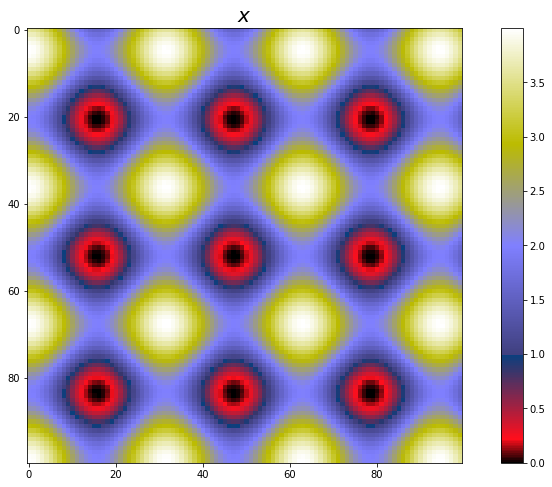

In [4]:
image_shape = (100, 100)
x = np.array([np.cos(np.arange(image_shape[0]) / 5) for i in range(image_shape[1])])
x += np.rot90(x, 1) + np.abs(np.min(x)) * 2
x = x.flatten()

display(x, r'$x$', image_shape)

np.save('data/cs_true_data.npy', x)

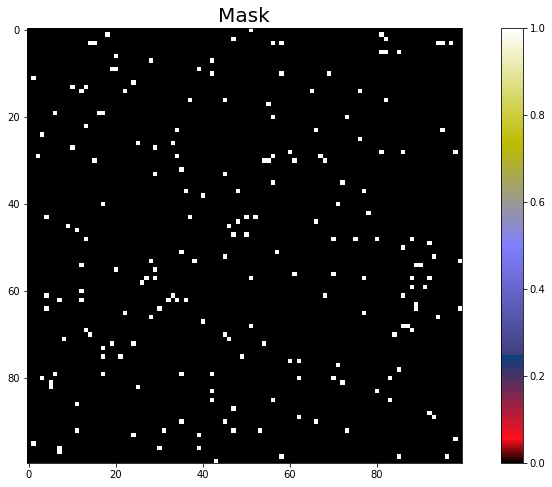

In [5]:
n_samples = x.size
n_subsamples = int(n_samples * 0.02)

mask = np.zeros(n_samples)
mask[np.random.permutation(n_samples)[:n_subsamples]] = 1

display(mask, 'Mask', shape=image_shape)

np.save('data/cs_mask.npy', mask)

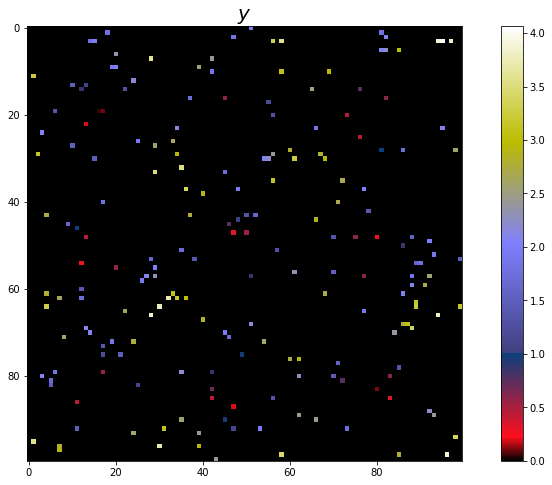

In [6]:
# Function to mask a signal.
def mask_op(signal, mask):

    return signal[np.where(mask == 1)[0]]

# Function to upsample a signal.
def upsample(signal, mask, dtype=complex):

    val = np.copy(mask).astype(dtype)
    val[val == 1] *= signal
    return val

y = mask_op(x, mask)
y += 0.1 * np.random.randn(y.size)

display(upsample(y, mask), r'$y$', shape=image_shape)

np.save('data/cs_obs_data.npy', y)

In [7]:
def fftconvolve(image, kernel):

    x = np.fft.fftshift(np.fft.fftn(image))
    y = np.fft.fftshift(np.fft.fftn(kernel))

    return np.real(np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(x * y))))

def make_psf(shape, sigma):
    
    psf = np.zeros(shape)
    psf[list(zip(np.array(psf.shape) // 2))] = 1
    
    return gaussian_filter(psf, sigma)

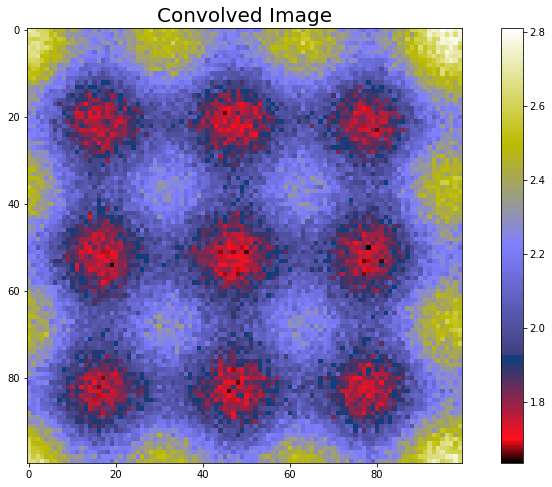

In [8]:
psf = make_psf(image_shape, 10)
conv_image = fftconvolve(x.reshape(image_shape), psf) + 0.05 * np.random.randn(*image_shape)

display(conv_image, title='Convolved Image')

np.save('data/deconv_obs_data.npy', conv_image)
np.save('data/deconv_psf.npy', psf)